# Reinforcement Learning

In [1]:
#import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import numpy as np
from tic_tac_toe import TicTacToe
from negamax import NegaMax
from game_tic_tac_toe import Game
from human_ui import HumanUI
from board_position_state import BoardPositionState
from board_position_states import BoardPositionStates
from reinforcement_learning import ReinforcementLearning
from trainer import Trainer

#### Player interface

The game player interface is described in player.py

(This is more for documentation purposes, as none of the methods are implemented.)

It basically has two functions:
- get_move (board, possible_moves, player_1_or_2)
- update_probabilities_as_game_is_over(final_result)   # This is only used by the Reinforcement Learning algorithm

All player classes will implement these two functions.

This is how the Game class interacts with the two players.

A player can be a
- UI (to allow the user to play)
- NegaMax (brute force algorithm)
- Reinforcement Learning algorithm (which learns by playing NegaMax)

The Game class has a Start method, which takes two player objects as parameters.

It then calls get_move for each player in turn, updating the game board, after each player's move.

#### NegaMax vs User

NegaMax defaults to a depth of 2

In [3]:
Game().start(HumanUI(),NegaMax())
# UI play sequence for demo (NegaMax blocks opponent and wins)
#   2    3    3

UI ~ Current player 1 or 2(= -1): 1
UI ~ Current board : 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
UI ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

        UI ~ Please enter the zero-based index of the desired move from the list of possible moves:

 2
UI ~ HumanUI: move_index: 2
UI ~ int(move_index): 2

Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[0 0 1]
 [0 0 0]
 [0 0 0]]
possible_moves: [(0, 0), (0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

UI ~ Current player 1 or 2(= -1): 1
UI ~ Current board : 
[[-1  0  1]
 [ 0  0  0]
 [ 0  0  0]]
UI ~ possible_moves: [(0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

        UI ~ Please enter the zero-based index of the desired move from the list of possible moves:

 3
UI ~ Huma

In [ ]:
# UI play sequence for demo (NegaMax blocks opponent and wins)
#   2    3    3

#### User vs Reinforcement Learning algorithm

The RL algorithm needs to know which player it is when it is instantiated i.e. 1 or -1 (player 1 or 2)

Then it must be passed in as the corresponding first or second parameter to the Game start method.

In [4]:
# Prints out the Reinforcement Learning player's learned position probabilities in the given order
from collections import OrderedDict

def print_rl_position_probabilities(player_rl, order_is_reverse=False):
    """Prints out the Reinforcement Learning player's learned position probabilities in the given order"""
    
    position_key_values = player_rl.board_position_states.position_states_dictionary.items()
    position_key_values_sorted = sorted(position_key_values,key=lambda x: x[1].get_win_draw_prob_value(),\
                                        reverse=order_is_reverse)
    position_key_values_sorted_dict = OrderedDict(position_key_values_sorted)
    # d_sorted_by_value = OrderedDict(sorted(d.items(), key=lambda x: x[1]))
    
    print('Board probabilities:')
    print()

    # for board_key, board_position_state in player1.board_position_states.position_states_dictionary.items():
    for board_key, board_position_state in position_key_values_sorted_dict.items():
#         print('board_key:', np.asarray(board_key))
        print('board_key:')
        print(np.asarray(board_key)) # convert nested tuples to nested arrays for better printing
        print('win_probability:', board_position_state.win_probability)
        print('draw_probability:', board_position_state.draw_probability)
        print('win_draw_prob:', board_position_state.get_win_draw_prob_value())
        print()
        

In [5]:
player2_rl = ReinforcementLearning(-1) # initialize new (untrained) RL algorithm as player2 (= -1)

In [6]:
Game().start(HumanUI(), player2_rl)
# Game sequence for demo
#   4     0[unless he went bottom right]    [pick position to win: usually -1 (or -2)]

UI ~ Current player 1 or 2(= -1): 1
UI ~ Current board : 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
UI ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

        UI ~ Please enter the zero-based index of the desired move from the list of possible moves:

 4
UI ~ HumanUI: move_index: 4
UI ~ int(move_index): 4

Original 'new' move: (1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): -1
RL ~ Current board: 
[[0 0 0]
 [0 1 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (-1, (1, 0))

game_over: False; win_loss: 0

UI ~ Current player 1 or 2(= -1): 1
UI ~ Current board : 
[[ 0  0  0]
 [-1  1  0]
 [ 0  0  0]]
UI ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 0), (2, 1), (2, 2)]

        UI ~ Please enter the zero-based index of the desired move from the list of possible moves:

 0
UI ~ HumanUI: move_index: 0
UI ~ int(move_index): 0

Original 'new' move: (1, (0

In [ ]:
# Game sequence for demo
#   4     0[unless he went bottom right]    [pick position to win: usually -1 (or -2)]

In [7]:
print_rl_position_probabilities(player2_rl)

Board probabilities:

board_key:
[[ 1  0  0]
 [-1  1  0]
 [ 0 -1  0]]
win_probability: 0.26666666666666666
draw_probability: 0.26666666666666666
win_draw_prob: 0.8

board_key:
[[ 0  0  0]
 [-1  1  0]
 [ 0  0  0]]
win_probability: 0.32
draw_probability: 0.32
win_draw_prob: 0.96

board_key:
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  0]]
win_probability: 0.3333333333333333
draw_probability: 0.3333333333333333
win_draw_prob: 1.0

board_key:
[[ 0 -1  0]
 [ 0  1  0]
 [ 0  0  0]]
win_probability: 0.3333333333333333
draw_probability: 0.3333333333333333
win_draw_prob: 1.0

board_key:
[[ 0  0 -1]
 [ 0  1  0]
 [ 0  0  0]]
win_probability: 0.3333333333333333
draw_probability: 0.3333333333333333
win_draw_prob: 1.0

board_key:
[[ 0  0  0]
 [ 0  1 -1]
 [ 0  0  0]]
win_probability: 0.3333333333333333
draw_probability: 0.3333333333333333
win_draw_prob: 1.0

board_key:
[[ 0  0  0]
 [ 0  1  0]
 [-1  0  0]]
win_probability: 0.3333333333333333
draw_probability: 0.3333333333333333
win_draw_prob: 1.0

board_key:
[[ 0 

In [8]:
player1_rl = ReinforcementLearning(1)  # initialize new (untrained) RL algorithm
player2_nm = NegaMax()

In [9]:
Trainer().start(player1_rl, player2_nm, 1_000)
# Timing
# 1_000 = 1,000 games: 14 seconds approx

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 0))

game_over: False; win_loss: 0

Current board: 
[[1 0 0]
 [0 0 0]
 [0 0 0]]
possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1  0]
 [ 0  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1  0]
 [ 0  0  0]
 [ 0  0  1]]
possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move

Original 'new' move: (-1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1  0]
 [ 0 -1  0]
 [ 0  1  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  1  1]
 [ 0 -1  0]
 [ 0  1  0]]
possible_moves: [(1, 0), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 2)
move_index: 3
int(move_index): 3

Original 'new' move: (-1, (2, 2))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1  1  1]
 [ 0 -1  0]
 [ 0  1 -1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 0))

game_over: False; win_loss: 0

Current board: 
[[1 0 0]
 [0 0 0]
 [0 0 0]]
possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0)

int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1 -1 -1]
 [ 1  0  1]
 [ 1 -1  1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [1 0 0]
 [0 0 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 1  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 1  0  0]
 [ 0  0 


RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 0  1  0]
 [ 0  1  0]]
possible_moves: [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  0]
 [ 0  1  0]
 [ 0  1  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  0]
 [ 0  1  0]
 [ 0  1  1]]
possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' 

Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  1]
 [ 0  1  0]
 [-1  1  1]]
possible_moves: [(1, 0), (1, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 0))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1 -1  1]
 [-1  1  0]
 [-1  1  1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[0 0 1]
 [0 0 0]
 [0 0 0]]
possible_moves: [(0, 0), (0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1

The negamax method just returned - move_tuple: (2, 0)
move_index: 5
int(move_index): 5

Original 'new' move: (-1, (2, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [-1  1  1]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
Original 'new' move: (1, (0, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  0  0]
 [-1  1  1]]
possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 0)
move_index: 1
int(move_index): 1

Original 'new' move: (-1, (1, 0))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1  1  0]
 [-1  0  0]
 [-1  1  1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[0

int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1  0]
 [ 0  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1  1]
 [ 0  0  0]
 [ 0  0  0]]
possible_moves: [(1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1  1]
 [-1  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1  1]
 [-1  0  1]
 [ 0  0  0]]
possible_moves: [(1, 1), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method

The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  1]
 [ 0  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 0  0  0]
 [ 0  1  0]]
possible_moves: [(0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 0  0  0]
 [ 0  1  0]]
RL ~ possible_moves: [(1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (2, 0))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  1]
 [ 0  0  0]
 [ 1  1  0]]
possible_moves: [(1, 0), (1, 1

move_index: 1
int(move_index): 1

Original 'new' move: (-1, (2, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1 -1]
 [-1  1  1]
 [ 1  0 -1]]
RL ~ possible_moves: [(2, 1)]
Original 'new' move: (1, (2, 1))

game_over: True; win_loss: 0

Game is over. Final Board position:
[[ 1 -1 -1]
 [-1  1  1]
 [ 1  1 -1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [1 0 0]
 [0 0 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 1  0  0]
 

The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 2))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1 -1 -1]
 [ 0  0  1]
 [ 1  1  0]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 0]
 [0 1 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 0  1  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (0, 1))

game_over: 

Original 'new' move: (1, (0, 0))

game_over: False; win_loss: 0

Current board: 
[[1 0 0]
 [0 0 0]
 [0 0 0]]
possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1  0]
 [ 0  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1  0]
 [ 0  0  0]
 [ 0  0  1]]
possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 2
int(move_index): 2

Original 'new' move: (-1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1  0]
 [ 0 -1  0]
 [

Original 'new' move: (-1, (0, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1 -1]
 [-1  0  1]
 [ 1  0  0]]
RL ~ possible_moves: [(1, 1), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1 -1]
 [-1  0  1]
 [ 1  1  0]]
possible_moves: [(1, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 2)
move_index: 1
int(move_index): 1

Original 'new' move: (-1, (2, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1 -1]
 [-1  0  1]
 [ 1  1 -1]]
RL ~ possible_moves: [(1, 1)]
Original 'new' move: (1, (1, 1))

game_over: True; win_loss: 0

Game is over. Final Board position:
[[ 1 -1 -1]
 [-1  1  1]
 [ 1  1 -1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' 

RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 0  0  0]
 [ 1  0  0]]
possible_moves: [(0, 1), (1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 2
int(move_index): 2

Original 'new' move: (-1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  1]
 [ 0 -1  0]
 [ 1  0  0]]
RL ~ possible_moves: [(0, 1), (1, 0), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 1 -1  0]
 [ 1  0  0]]
possible_moves: [(0, 1), (1, 2), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 2)
move_index: 3
int(move_index): 3

Original 'new' move: (-1, (2, 2))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1  0  


game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [1 0 0]
 [0 0 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 1  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 1  0  0]
 [ 0  0  1]]
possible_moves: [(0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  0]
 [ 1  0  0]
 [ 0  0  1]]
RL ~ possible_moves: [

Original 'new' move: (1, (2, 0))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 0]
 [1 0 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 1  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 1  0  1]]
possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 1)
move_index: 5
int(move_index): 5

Original 'new' move: (-1, (2, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [

The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 0  1  0]
 [ 0  0  0]]
possible_moves: [(0, 1), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 0)
move_index: 3
int(move_index): 3

Original 'new' move: (-1, (2, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  1]
 [ 0  1  0]
 [-1  0  0]]
RL ~ possible_moves: [(0, 1), (1, 0), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 0  1  0]
 [-1  1  0]]
possible_moves: [(0, 1), (1, 0

RL ~ possible_moves: [(0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 1  0  0]
 [ 0  0  0]]
possible_moves: [(0, 1), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 1  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  1]
 [ 1  0  0]
 [ 0  0  1]]
possible_moves: [(1, 1), (1, 2), (2, 0), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 2)
move_index: 1
int(move_index): 1

Original 'new' move: (-1, (1, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Cur

Original 'new' move: (-1, (0, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0 -1]
 [ 0  1  0]
 [ 1  0  0]]
RL ~ possible_moves: [(0, 1), (1, 0), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0 -1]
 [ 0  1  1]
 [ 1  0  0]]
possible_moves: [(0, 1), (1, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1 -1 -1]
 [ 0  1  1]
 [ 1  0  0]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 0]
 [0 1 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  0]
 [ 1  0  0]
 [ 1  0  0]]
RL ~ possible_moves: [(0, 2), (1, 1), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 1))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  0]
 [ 1  1  0]
 [ 1  0  0]]
possible_moves: [(0, 2), (1, 2), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 2))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1 -1 -1]
 [ 1  1  0]
 [ 1  0  0]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 0))

game_over: False; win_loss: 0

Current board: 
[[1 0 0]
 [0 0 0]
 [0 0 0]]
possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax metho

RL ~ possible_moves: [(1, 1), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  1 -1]
 [-1  0  1]
 [ 1  0  1]]
possible_moves: [(1, 1), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 1)
move_index: 1
int(move_index): 1

Original 'new' move: (-1, (2, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1 -1]
 [-1  0  1]
 [ 1 -1  1]]
RL ~ possible_moves: [(1, 1)]
Original 'new' move: (1, (1, 1))

game_over: True; win_loss: 0

Game is over. Final Board position:
[[-1  1 -1]
 [-1  1  1]
 [ 1 -1  1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 1]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2

move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 0  0  0]
 [ 0  1  0]]
RL ~ possible_moves: [(1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (1, 1))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  1]
 [ 0  1  0]
 [ 0  1  0]]
possible_moves: [(1, 0), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 0)
move_index: 2
int(move_index): 2

Original 'new' move: (-1, (2, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 0  1  0]
 [-1  1  0]]
RL ~ possible_moves: [(1, 0), (1, 2), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  1]
 [ 0  1  0]
 [-1  1  1]]
possible_moves: [(1, 0), (1, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 0)
move_index: 0


RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 0))

game_over: False; win_loss: 0

Current board: 
[[1 0 0]
 [0 0 0]
 [0 0 0]]
possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1  0]
 [ 0  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1  0]
 [ 0  0  1]
 [ 0  0  0]]
possible_moves: [(0, 2), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 2))

game_over: False; win

Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 1  0  0]
 [ 0  0  1]]
possible_moves: [(0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  0]
 [ 1  0  0]
 [ 0  0  1]]
RL ~ possible_moves: [(0, 2), (1, 1), (1, 2), (2, 0), (2, 1)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  1]
 [ 1  0  0]
 [ 0  0  1]]
possible_moves: [(1, 1), (1, 2), (2, 0), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 2)
move_index: 1
int(move_index): 1

Original 'new' move: (-1, (1, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 1  0 -1]
 [ 0  0  1]]
RL ~ possible_moves: [(1, 1)

move_index: 3
int(move_index): 3

Original 'new' move: (-1, (2, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1  0]
 [-1  0  0]
 [ 1  1 -1]]
RL ~ possible_moves: [(0, 2), (1, 1), (1, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1  1]
 [-1  0  0]
 [ 1  1 -1]]
possible_moves: [(1, 1), (1, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1  1]
 [-1 -1  0]
 [ 1  1 -1]]
RL ~ possible_moves: [(1, 2)]
Original 'new' move: (1, (1, 2))

game_over: True; win_loss: 0

Game is over. Final Board position:
[[ 1 -1  1]
 [-1 -1  1]
 [ 1  1 -1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0

The negamax method just returned - move_tuple: (2, 1)
move_index: 4
int(move_index): 4

Original 'new' move: (-1, (2, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1  0]
 [ 0  1  0]
 [ 0 -1  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (2, 0))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  1  0]
 [ 1 -1  0]]
possible_moves: [(0, 2), (1, 0), (1, 2), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1 -1]
 [ 0  1  0]
 [ 1 -1  0]]
RL ~ possible_moves: [(1, 0), (1, 2), (2, 2)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[-1  1 -1]
 [ 1  1  0]
 [ 1 -1  0]]
possible_moves: [(1, 2), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax me

Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 1  0  1]]
possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 1)
move_index: 5
int(move_index): 5

Original 'new' move: (-1, (2, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 1 -1  1]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 0  0  0]
 [ 1 -1  1]]
possible_moves: [(0, 1), (1, 0), (1, 1), (1, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 0  0  0]
 [ 1 -1  1]]
RL ~ possible_moves: [(1, 0), (1, 1), (1, 2)]
Original 'new' move: (1, (1, 0))

game_over: Fa

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 0]
 [0 1 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 0  1  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 1  0  0]
 [ 0  1  0]]
possible_moves: [(0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 0]
 [0 1 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 0  1  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 1  0  0]
 [ 0  1  0]]
possible_moves: [(0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move

The negamax method just returned - move_tuple: (1, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 1  1 -1]
 [-1  1  0]]
RL ~ possible_moves: [(2, 2)]
Original 'new' move: (1, (2, 2))

game_over: True; win_loss: 0

Game is over. Final Board position:
[[-1 -1  1]
 [ 1  1 -1]
 [-1  1  1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[0 0 1]
 [0 0 0]
 [0 0 0]]
possible_moves: [(0, 0), (0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (=

The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 0  1  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 0  0  0]
 [ 0  1  0]]
possible_moves: [(0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 0  0  0]
 [ 0  1  0]]
RL ~ possible_moves: [(1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  1]
 [ 0  0  1]
 [ 0  1  0]]
possible_moves: [(1, 0), (1, 1

The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1  0]
 [ 0  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  1  0]
 [ 0  0  0]]
possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 1)
move_index: 4
int(move_index): 4

Original 'new' move: (-1, (2, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1  0]
 [ 0  1  0]
 [ 0 -1  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  1  0]
 [ 0 -1  1]]
possible_moves: [(0, 2), (1, 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 1  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 1  0  0]
 [ 0  0  0]]
possible_moves: [(0, 1), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 1  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  1]
 [ 1  0  1]
 [ 0  0  0]]
possible_moves: [(1, 1), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - mov

The negamax method just returned - move_tuple: (1, 2)
move_index: 2
int(move_index): 2

Original 'new' move: (-1, (1, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 1  1 -1]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 1  1 -1]
 [ 0  0  1]]
possible_moves: [(0, 1), (0, 2), (2, 0), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  0]
 [ 1  1 -1]
 [ 0  0  1]]
RL ~ possible_moves: [(0, 2), (2, 0), (2, 1)]
Original 'new' move: (1, (2, 0))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  0]
 [ 1  1 -1]
 [ 1  0  1]]
possible_moves: [(0, 2), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax me

Current board: 
[[-1  1  0]
 [ 0  1  0]
 [ 0  0  0]]
possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 1)
move_index: 4
int(move_index): 4

Original 'new' move: (-1, (2, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1  0]
 [ 0  1  0]
 [ 0 -1  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  1  0]
 [ 0 -1  1]]
possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1 -1]
 [ 0  1  0]
 [ 0 -1  1]]
RL ~ possible_moves: [(1, 0), (1, 2), (2, 0)]
Original 'new' move: (1, (2, 0))

game_over: Fa

Original 'new' move: (1, (1, 2))

game_over: True; win_loss: 1

Game is over. Final Board position:
[[ 1 -1  1]
 [-1 -1  1]
 [ 0  0  1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 1]
 [0 0 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  1]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 0  1  1]
 [ 0  0  0]]
possible_moves: [

RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 0  0  0]
 [ 1  0  0]]
possible_moves: [(0, 1), (1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 2
int(move_index): 2

Original 'new' move: (-1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  1]
 [ 0 -1  0]
 [ 1  0  0]]
RL ~ possible_moves: [(0, 1), (1, 0), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  1  1]
 [ 0 -1  0]
 [ 1  0  0]]
possible_moves: [(1, 0), (1, 2), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 2)
move_index: 3
int(move_index): 3

Original 'new' move: (-1, (2, 2))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1  1  

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [1 0 0]
 [0 0 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 1  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 1  0  0]
 [ 0  1  0]]
possible_moves: [(0, 1), (0, 2), (1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move

Current board: 
[[-1 -1  0]
 [ 1  1  0]
 [ 0  1  0]]
possible_moves: [(0, 2), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 2))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1 -1 -1]
 [ 1  1  0]
 [ 0  1  0]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 0]
 [0 1 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 

game_over: False; win_loss: 0

Current board: 
[[0 1 0]
 [0 0 0]
 [0 0 0]]
possible_moves: [(0, 0), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1  0]
 [ 0  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  0  1]
 [ 0  0  0]]
possible_moves: [(0, 2), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1 -1]
 [ 0  0  1]
 [ 0  0  0]]
RL ~ possible_moves: [(

The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  1  0]
 [ 0  0  0]]
possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 1)
move_index: 4
int(move_index): 4

Original 'new' move: (-1, (2, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1  0]
 [ 0  1  0]
 [ 0 -1  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  1  0]
 [ 0 -1  1]]
possible_moves: [(0, 2), (1, 0

Current board: 
[[-1 -1  1]
 [ 0  0  1]
 [ 0  1  0]]
possible_moves: [(1, 0), (1, 1), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 2)
move_index: 3
int(move_index): 3

Original 'new' move: (-1, (2, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 0  0  1]
 [ 0  1 -1]]
RL ~ possible_moves: [(1, 0), (1, 1), (2, 0)]
Original 'new' move: (1, (1, 1))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  1]
 [ 0  1  1]
 [ 0  1 -1]]
possible_moves: [(1, 0), (2, 0)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [-1  1  1]
 [ 0  1 -1]]
RL ~ possible_moves: [(2, 0)]
Original 'new' move: (1, (2, 0))

game_over: True; win_loss: 1

Game is over. Final Board position:
[[-1 -1  1]


Original 'new' move: (-1, (1, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1 -1]
 [-1  0  0]
 [ 0  1  1]]
RL ~ possible_moves: [(1, 1), (1, 2), (2, 0)]
Original 'new' move: (1, (2, 0))

game_over: True; win_loss: 1

Game is over. Final Board position:
[[ 1 -1 -1]
 [-1  0  0]
 [ 1  1  1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 1]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 0  0  1]]
RL ~ 


game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  0]
 [ 0  1  0]
 [ 0  0  1]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]
Original 'new' move: (1, (2, 0))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  0]
 [ 0  1  0]
 [ 1  0  1]]
possible_moves: [(0, 2), (1, 0), (1, 2), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 2))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1 -1 -1]
 [ 0  1  0]
 [ 1  0  1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 1]
 [0 0 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
Current player 1

RL ~ possible_moves: [(1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1 -1]
 [ 1  0  0]
 [ 0  1  0]]
possible_moves: [(1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 0)
move_index: 2
int(move_index): 2

Original 'new' move: (-1, (2, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1 -1]
 [ 1  0  0]
 [-1  1  0]]
RL ~ possible_moves: [(1, 1), (1, 2), (2, 2)]
Original 'new' move: (1, (1, 1))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1 -1]
 [ 1  1  0]
 [-1  1  0]]
possible_moves: [(1, 2), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1 -1]
 [ 1  1 -1]
 [-1  1  0]]
RL ~ possible_

Original 'new' move: (1, (2, 0))

game_over: False; win_loss: 0

Current board: 
[[-1  1  1]
 [-1  0  0]
 [ 1  0  0]]
possible_moves: [(1, 1), (1, 2), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1  1]
 [-1 -1  0]
 [ 1  0  0]]
RL ~ possible_moves: [(1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  1  1]
 [-1 -1  0]
 [ 1  0  1]]
possible_moves: [(1, 2), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 2))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1  1  1]
 [-1 -1 -1]
 [ 1  0  1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possibl

The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 0  1  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (0, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  0  0]
 [ 0  1  0]]
possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 2
int(move_index): 2

Original 'new' move: (-1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1  0]
 [ 0 -1  0]
 [ 0  1  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0 -1  1]
 [ 0  1  0]]
possible_moves: [(0, 2), (1, 0

Original 'new' move: (-1, (2, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 1 -1  1]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
Original 'new' move: (1, (0, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  0  0]
 [ 1 -1  1]]
possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1 -1]
 [ 0  0  0]
 [ 1 -1  1]]
RL ~ possible_moves: [(1, 0), (1, 1), (1, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  1 -1]
 [ 0  0  1]
 [ 1 -1  1]]
possible_moves: [(1, 0), (1, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 0)
move_index: 0
int(move_index): 0

Original 'new'

The negamax method just returned - move_tuple: (1, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1  1]
 [-1  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1  1]
 [-1  0  0]
 [ 0  1  0]]
possible_moves: [(1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1  1]
 [-1 -1  0]
 [ 0  1  0]]
RL ~ possible_moves: [(1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1  1]
 [-1 -1  1]
 [ 0  1  0]]
possible_moves: [(2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax me

RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 0))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 0]
 [1 0 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 1  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 1  0  1]]
possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 1)
move_index: 5
int(move_index): 5

Origina

The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  1]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 0  0  1]
 [ 0  0  0]]
possible_moves: [(0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 2)
move_index: 5
int(move_index): 5

Original 'new' move: (-1, (2, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  1]
 [ 0  0  1]
 [ 0  0 -1]]
RL ~ possible_moves: [(0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 1  0  1]
 [ 0  0 -1]]
possible_moves: [(0, 1), (1, 1

move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1  0]
 [ 0  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 2))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1  0]
 [ 0  0  1]
 [ 0  0  0]]
possible_moves: [(0, 2), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1 -1]
 [ 0  0  1]
 [ 0  0  0]]
RL ~ possible_moves: [(1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 1))

game_over: False; win_loss: 0

Current board: 
[[ 1 -1 -1]
 [ 0  1  1]
 [ 0  0  0]]
possible_moves: [(1, 0), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The 

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 1  1  0]]
possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 2)
move_index: 5
int(move_index): 5

Original 'new' move: (-1, (2, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 1  1 -1]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
Original 'new' move: (1, (0, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  0  0]
 [ 1  1 -1]]
possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 2
int(move_index): 2

Original 'new' move: (-1, (1, 1))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1  1  0]
 [ 0 -1  0]
 [ 1  1 -1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]

Original 'new' move: (-1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  1]
 [ 0 -1  0]
 [ 1  0  0]]
RL ~ possible_moves: [(0, 1), (1, 0), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 0 -1  0]
 [ 1  1  0]]
possible_moves: [(0, 1), (1, 0), (1, 2), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 2)
move_index: 3
int(move_index): 3

Original 'new' move: (-1, (2, 2))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1  0  1]
 [ 0 -1  0]
 [ 1  1 -1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 1))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 1 0]
 [0 0 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0)

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  1]
 [ 0  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 1  0  0]
 [ 0  0  0]]
possible_moves: [(0, 1), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 1  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  1]
 [ 1  0  0]
 [ 0  1  0]]
possible_moves: [(1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 0
int(move_index): 0

Original 'new' m

The negamax method just returned - move_tuple: (1, 2)
move_index: 2
int(move_index): 2

Original 'new' move: (-1, (1, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 1  1 -1]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 1), (0, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 1  1 -1]
 [ 0  0  0]]
possible_moves: [(0, 1), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 0)
move_index: 1
int(move_index): 1

Original 'new' move: (-1, (2, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  1]
 [ 1  1 -1]
 [-1  0  0]]
RL ~ possible_moves: [(0, 1), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 1  1 -1]
 [-1  0  1]]
possible_moves: [(0, 1), (2, 1)]
Current player 1 or 2 (-1): -1
The negamax me


RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  0  0]
 [ 0  0  0]
 [ 1  1 -1]]
RL ~ possible_moves: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
Original 'new' move: (1, (1, 0))

game_over: False; win_loss: 0

Current board: 
[[-1  0  0]
 [ 1  0  0]
 [ 1  1 -1]]
possible_moves: [(0, 1), (0, 2), (1, 1), (1, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 2
int(move_index): 2

Original 'new' move: (-1, (1, 1))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1  0  0]
 [ 1 -1  0]
 [ 1  1 -1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 2))

game_over: False; win_loss: 0

Current board: 
[[0 0 1]
 [0 0 0]
 [0 0 0]]
possible_moves: [(0, 0), (0, 1), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax meth

The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1  0]
 [ 0  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 0))

game_over: False; win_loss: 0

Current board: 
[[-1  1  0]
 [ 0  0  0]
 [ 1  0  0]]
possible_moves: [(0, 2), (1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 2)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 2))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1  1 -1]
 [ 0  0  0]
 [ 1  0  0]]
RL ~ possible_moves: [(1, 0), (1, 1), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  1 -1]
 [ 0  0  0]
 [ 1  1  0]]
possible_moves: [(1, 0), (1, 1

RL ~ Current board: 
[[-1  0  1]
 [ 0 -1  0]
 [ 1  0  0]]
RL ~ possible_moves: [(0, 1), (1, 0), (1, 2), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[-1  0  1]
 [ 0 -1  0]
 [ 1  1  0]]
possible_moves: [(0, 1), (1, 0), (1, 2), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (2, 2)
move_index: 3
int(move_index): 3

Original 'new' move: (-1, (2, 2))

game_over: True; win_loss: -1

Game is over. Final Board position:
[[-1  0  1]
 [ 0 -1  0]
 [ 1  1 -1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[0 0 0]
 [0 0 0]
 [0 1 0]]
possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)


possible_moves: [(1, 1), (2, 0)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[ 1 -1 -1]
 [-1 -1  1]
 [ 0  1  1]]
RL ~ possible_moves: [(2, 0)]
Original 'new' move: (1, (2, 0))

game_over: True; win_loss: 1

Game is over. Final Board position:
[[ 1 -1 -1]
 [-1 -1  1]
 [ 1  1  1]]
RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[0 0 0]
 [0 0 0]
 [0 0 0]]
RL ~ possible_moves: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (0, 1))

game_over: False; win_loss: 0

Current board: 
[[0 1 0]
 [0 0 0]
 [0 0 0]]
possible_moves: [(0, 0), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 0)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 0

[[-1  0  1]
 [ 1  0  0]
 [ 0  0  0]]
possible_moves: [(0, 1), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (0, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (0, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 1  0  0]
 [ 0  0  0]]
RL ~ possible_moves: [(1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
Original 'new' move: (1, (2, 1))

game_over: False; win_loss: 0

Current board: 
[[-1 -1  1]
 [ 1  0  0]
 [ 0  1  0]]
possible_moves: [(1, 1), (1, 2), (2, 0), (2, 2)]
Current player 1 or 2 (-1): -1
The negamax method just returned - move_tuple: (1, 1)
move_index: 0
int(move_index): 0

Original 'new' move: (-1, (1, 1))

game_over: False; win_loss: 0

RL ~ Current player 1 or 2 (= -1): 1
RL ~ Current board: 
[[-1 -1  1]
 [ 1 -1  0]
 [ 0  1  0]]
RL ~ possible_moves: [(1, 2), (2, 0), (2, 2)]
Original 'new' move: (1, (2, 2))

game_over: False; win_loss: 0

(<reinforcement_learning.ReinforcementLearning at 0x120fd5358>,
 <negamax.NegaMax at 0x120fd5400>)

In [10]:
df = pd.DataFrame(player1_rl.win_draw_loss_record, columns=["win_loss"])

In [11]:
def group_by_100(df, win_loss):
    """Groups all wins or losses (win_loss filter is 1 or -1) in the dataframe 
    and returns a new dataframe"""
    
    group_size = 100
    df_filtered = df[df.win_loss == win_loss]
    
    # use absolute (abs) in case we are summing losses i.e. negative one (-1)
    return abs(df_filtered.groupby((df_filtered.index//group_size)*group_size).sum())

In [12]:
df_win_100 = group_by_100(df, 1)
#df_win_100
df_loss_100 = group_by_100(df, -1)
#df_loss_100

In [13]:
def plot_win_losses(df_win, df_loss, number_of_games):
    plt.title(f'Win Loss rate for Reinforcement Algorithm \
per 100 games played. Learning:0.2. Depth:2. {str(number_of_games)} games')

    plt.xlabel('Total number of games played (Draws not shown above)')
    plt.ylabel('Wins(Green) Losses(Red)')
    plt.plot(df_win, c='green') 
    plt.plot(df_loss, c='red')


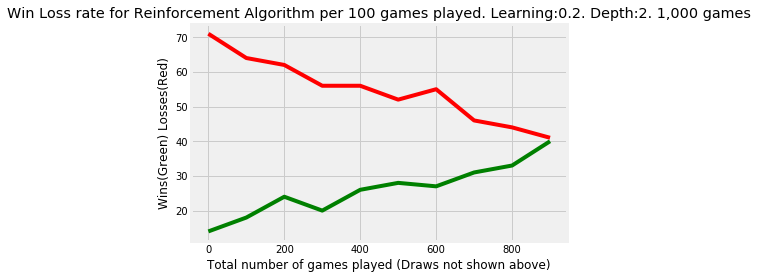

In [14]:
plot_win_losses(df_win_100, df_loss_100, '1,000')

#### To save time, a previously executed 10,000 game Reinforcement Learning algorithm dataframe has been saved to disk.

In [15]:
df_10_000_disk = pd.read_json('df_10_000.json')

In [16]:
df_10_000_disk.win_loss.value_counts()

 1    5284
 0    2757
-1    1959
Name: win_loss, dtype: int64

In [17]:
df_win_100_disk = group_by_100(df_10_000_disk, 1)
df_loss_100_disk = group_by_100(df_10_000_disk, -1)

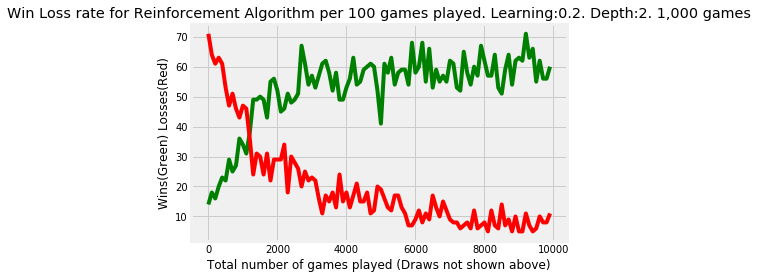

In [18]:
plot_win_losses(df_win_100_disk, df_loss_100_disk, '1,000')

### AWS (Amazon Web Services) Deep Racer

##### AWS Deep Racer allows you to traing a Reinforcement Learning algorithm to drive a car

The car is trained on a virtual race track running on Amazon's cloud infrastructure.
The model can then be submitted to virtual races where your time is compared to other competitors.

###### There is also a physical 1/18th scale car that you can buy and download your trained model into, and then compete in actual (physical) races run by Amazon

https://reinvent.awsevents.com/learn/deepracer/

https://www.amazon.com/AWS-DeepRacer-Fully-autonomous-developers/dp/B07JMHRKQG

## Resources

#### Reinforcement Learning: An Introduction,   2nd Edition - Richard S. Sutton and Andrew G. Barto

Online PDF: http://incompleteideas.net/book/bookdraft2017nov5.pdf

Amazon: https://www.amazon.com/Reinforcement-Learning-Introduction-Adaptive-Computation/dp/0262039249/


### Applications of Reinforcement Learning


#### Robot uses Reinforcement Learning to train itself in picking up - MIT Technology Review - Fanuc robot

https://www.technologyreview.com/s/601045/this-factory-robot-learns-a-new-job-overnight/


#### DeepMind AI Reduces Google Data Centre Cooling Bill by 40%

https://deepmind.com/blog/article/deepmind-ai-reduces-google-data-centre-cooling-bill-40


#### A Deep Reinforcement Learning Approach to Autonomous Driving

https://web.stanford.edu/~anayebi/projects/CS_239_Final_Project_Writeup.pdf





#### AlphaGo Zero - DeepMind blog

https://deepmind.com/blog/article/alphago-zero-starting-scratch


#### Playing Atari with Deep Reinforcement Learning - DeepMind Technologies

https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf


### On Choosing a Deep Reinforcement Learning Library

https://medium.com/data-from-the-trenches/choosing-a-deep-reinforcement-learning-library-890fb0307092

### Other Resources

Advanced Reinforcement Learning by Udacity :- https://www.udacity.com/course/reinforcement-learning--ud600

Deep Reinforcement Learning CS 285 BY UC Berkeley :-  http://rail.eecs.berkeley.edu/deeprlcourse/?fbclid=IwAR3sqqeNMtClYv2wsUqGEiiJrXRn0VhcJTY49GkdsumvFTzeTNJRX5Hev9s    
Complete Playlist :- https://www.youtube.com/watch?v=zVA5Pg8FVW4&list=PLkFD6_40KJIxJMR-j5A1mkxK26gh_qg37&index=2&t=0s (!?!?!?)

#### Deep RL Bootcamp - Berkeley CA

https://sites.google.com/view/deep-rl-bootcamp/lectures 

#### Amazon AWS DeepRacer

https://medium.com/@banerjee.siddhartha.sb/aws-deepracer-looking-under-the-hood-for-design-of-the-reward-function-and-adjusting-e9dd3805ebbf  

The log-analysis and local training - blogs :- https://codelikeamother.uk/using-jupyter-notebook-for-analysing-deepracer-s-logs https://github.com/aws-samples/aws-deepracer-workshops/blob/master/log-analysis/DeepRacer%20Log%20Analysis.ipynb  

https://deepsense.ai/what-is-reinforcement-learning-the-complete-guide/  A complete guide for Reinforcement Learning for beginners.

The role of the Discount Factor on Reinforcement Learning :https://stats.stackexchange.com/questions/221402/understanding-the-role-of-the-discount-factor-in-reinforcement-learning

Reinforcement learning tutorial with TensorFlow:

https://adventuresinmachinelearning.com/reinforcement-learning-tensorflow/ (edited) 


https://www.youtube.com/playlist?list=PLdAoL1zKcqTXFJniO3Tqqn6xMBBL07EDc  Basic Reinforcement Learning By University of Waterloo.

Uses RL to solve a rubiks cube:  https://openai.com/blog/solving-rubiks-cube/

Multi-Agent-Reinforcement Learning by Microsoft:- https://www.youtube.com/watch?v=Yd6HNZnqjis&list=PLD7HFcN7LXRe9nWEX3Up-RiCDi6-0mqVC

##### Deep Q Network vs Policy Gradients

https://flyyufelix.github.io/2017/10/12/dqn-vs-pg.html

###### Demystifying Deep Reinforcement Learning

https://www.intel.ai/demystifying-deep-reinforcement-learning/#gs.gazc94

##### Introduction to Various Reinforcement Learning Algorithms

https://towardsdatascience.com/introduction-to-various-reinforcement-learning-algorithms-part-ii-trpo-ppo-87f2c5919bb9

#### 	Free Udacity course:  Intro to TensorFlow for Deep Learning
https://www.udacity.com/course/intro-to-tensorflow-for-deep-learning--ud187

#### Introduction to Deep Reinforcement Learning and Control - Carnegie Mellon

https://www.cs.cmu.edu/~katef/DeepRLFall2018/lecture1_intro.pdf

#### YouTube Recommendation System uses Reinforcement Learning - NY Times article - search for Reinforce

https://www.nytimes.com/interactive/2019/06/08/technology/youtube-radical.html